# 03 - Simulate Additional Information

This notebook focuses on enhancing the `hr_data_df` dataset by simulating additional information, such as skills, certifications, and education levels. These simulated features are tailored to align with the roles and experience levels of employees, making the dataset more representative and suitable for the MVP of the bias and fairness CV-screening demonstrator.

In [1]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt

import json

In [2]:
# NumPy random
np.random.seed(42)

In [3]:
# Display all rows and columns
pd.set_option('display.max_colwidth', None)  # Show full content in each cell
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns

In [4]:
df = pd.read_parquet("../data/interim/hr_data.parquet")

In [5]:
df.head(5)

,Employee_Name,Position,State,Zip,Sex,CitizenDesc,HispanicLatino,RaceDesc,Department,PerformanceScoreNumeric,Age,GoodFit,YearsExperience,AgeGroup,ExperienceCategory
0,"Gonzalez, Maria",IT Support,MA,2472.0,F,US Citizen,Yes,White,IT/IS,3,43,1,10,30-50,11-20 years
1,"Cockel, James",Production Technician I,MA,2452.0,M,US Citizen,No,White,Production,3,47,1,11,30-50,11-20 years
2,"Bunbury, Jessica",Area Sales Manager,VA,21851.0,F,Eligible NonCitizen,No,Black or African American,Sales,3,60,1,13,>50,11-20 years
3,"Buck, Edward",Area Sales Manager,MA,2330.0,M,US Citizen,No,White,Sales,3,49,1,10,30-50,11-20 years
4,"Jacobi, Hannah",Production Technician I,MA,1778.0,F,US Citizen,No,White,Production,3,58,1,11,>50,11-20 years


In [6]:
df.Position.value_counts()

Position
Production Technician I         1422
Production Technician II         523
Area Sales Manager               259
Production Manager               154
IT Support                        88
Software Engineer                 88
Data Analyst                      77
Network Engineer                  55
Database Administrator            55
Sr. Network Engineer              48
BI Developer                      44
Administrative Assistant          33
Accountant I                      33
Sales Manager                     30
Senior BI Developer               30
IT Manager - DB                   22
Shared Services Manager           20
IT Director                       11
CIO                               11
Data Analyst                      11
IT Manager - Support              11
IT Manager - Infra                11
Data Architect                    11
BI Director                       11
Director of Sales                 11
Director of Operations            11
President & CEO              

In [7]:
df['Position'] = df['Position'].str.strip()

In [8]:
role_skills = {
    'Production Technician I': [
        ('Basic Machinery Maintenance', lambda exp: 0.9 if exp <= 5 else 0.6),
        ('Safety Protocols', lambda exp: 0.9 if exp <= 5 else 0.7),
        ('Problem Identification', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('Advanced Machinery Troubleshooting', lambda exp: 0.2 if exp <= 5 else 0.6),
        ('Teamwork', lambda exp: 0.8),
    ],
    'Production Technician II': [
        ('Advanced Machinery Maintenance', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Safety Protocols', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Problem-Solving', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Efficiency Optimization', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Leadership Skills', lambda exp: 0.2 if exp <= 5 else 0.6),
        ('Teamwork', lambda exp: 0.8),
        ('Advanced Troubleshooting Techniques', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Preventive Maintenance Planning', lambda exp: 0.4 if exp <= 5 else 0.7),
    ],
    'Area Sales Manager': [
        ('Sales Strategy', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Negotiation', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Customer Relationship Management', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Market Analysis', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Team Leadership', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Advanced CRM Tools', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Competitor Analysis', lambda exp: 0.4 if exp <= 5 else 0.6),
    ],
    'Production Manager': [
        ('Process Optimization', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Team Management', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Budget Planning', lambda exp: 0.4 if exp <= 5 else 0.8),
        ('Lean Manufacturing', lambda exp: 0.3 if exp <= 5 else 0.7),
        ('Quality Assurance', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Production Line Efficiency Analysis', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Cost Reduction Techniques', lambda exp: 0.4 if exp <= 5 else 0.7),
    ],
    'IT Support': [
        ('Troubleshooting', lambda exp: 0.9),
        ('Hardware Maintenance', lambda exp: 0.8),
        ('Customer Support', lambda exp: 0.7),
        ('Network Configuration', lambda exp: 0.3 if exp <= 5 else 0.7),
        ('System Upgrades', lambda exp: 0.2 if exp <= 5 else 0.6),
    ],
    'Software Engineer': [
        ('Python', lambda exp: 0.9 if exp <= 5 else 0.95),
        ('Java', lambda exp: 0.7 if exp <= 5 else 0.85),
        ('Software Design', lambda exp: 0.6 if exp <= 5 else 0.9),
        ('System Architecture', lambda exp: 0.2 if exp <= 5 else 0.8),
        ('Machine Learning', lambda exp: 0.3 if exp <= 5 else 0.7),
    ],
    'Data Analyst': [
        ('SQL', lambda exp: 0.9 if exp <= 5 else 0.95),
        ('Python', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Data Visualization', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('Statistical Analysis', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Business Intelligence Tools', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Machine Learning', lambda exp: 0.3 if exp <= 5 else 0.7),
    ],
    'Network Engineer': [
        ('Network Configuration', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Firewall Management', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('VPN Setup', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Troubleshooting', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Cloud Networking', lambda exp: 0.3 if exp <= 5 else 0.7),
        ('Advanced Firewall Configurations', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Network Performance Optimization', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('SD-WAN Deployment', lambda exp: 0.3 if exp <= 5 else 0.6),
    ],
    'Database Administrator': [
        ('SQL Optimization', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Database Management', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Backup Strategies', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Performance Tuning', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Data Security', lambda exp: 0.3 if exp <= 5 else 0.6),
    ],
    'Sales Manager': [
        ('Sales Strategy', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Team Management', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('Negotiation', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Customer Retention', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Revenue Optimization', lambda exp: 0.3 if exp <= 5 else 0.7),
    ],
    'Sr. Network Engineer': [
        ('Advanced Network Configuration', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Firewall Expertise', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Cloud Integration', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Network Security Design', lambda exp: 0.3 if exp <= 5 else 0.7),
        ('System Troubleshooting', lambda exp: 0.7),
    ],
    'BI Developer': [
        ('Data Visualization', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('ETL Development', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('Business Intelligence Tools', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('SQL', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Dashboard Creation', lambda exp: 0.4 if exp <= 5 else 0.6),
        ('ETL Automation', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Predictive Analytics Integration', lambda exp: 0.4 if exp <= 5 else 0.6),
    ],
    'Administrative Assistant': [
        ('Document Management', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Scheduling', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('Customer Communication', lambda exp: 0.6 if exp <= 5 else 0.7),
        ('Basic Accounting', lambda exp: 0.4 if exp <= 5 else 0.6),
        ('Office Coordination', lambda exp: 0.5 if exp <= 5 else 0.7),
    ],
    'Accountant I': [
        ('Financial Reporting', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('QuickBooks', lambda exp: 0.6 if exp <= 5 else 0.7),
        ('Tax Preparation', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Budget Planning', lambda exp: 0.3 if exp <= 5 else 0.6),
        ('Audit Assistance', lambda exp: 0.5),
    ],
    'Enterprise Architect': [
        ('System Architecture Design', lambda exp: 0.8 if exp <= 5 else 0.95),
        ('Solution Architecture', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Business-IT Alignment', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Cloud Strategy', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Governance and Standards', lambda exp: 0.3 if exp <= 5 else 0.6),
    ],
    'IT Director': [
        ('IT Governance', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Leadership', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Vendor Management', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('IT Security Oversight', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Strategic Planning', lambda exp: 0.4 if exp <= 5 else 0.7),
    ],
    'President & CEO': [
        ('Strategic Vision', lambda exp: 0.9),
        ('Leadership', lambda exp: 0.8),
        ('Financial Management', lambda exp: 0.7),
        ('Public Relations', lambda exp: 0.6),
        ('Risk Assessment', lambda exp: 0.5),
    ],
    'IT Manager - DB': [
        ('Database Management', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Performance Tuning', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Backup Strategies', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Vendor Management', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('IT Governance', lambda exp: 0.3 if exp <= 5 else 0.6),
    ],
    'Administrative Assistant': [
        ('Document Management', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Scheduling', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('Customer Communication', lambda exp: 0.6 if exp <= 5 else 0.7),
        ('Office Coordination', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Basic Accounting', lambda exp: 0.4 if exp <= 5 else 0.6),
    ],
    'Senior BI Developer': [
        ('Data Pipeline Optimization', lambda exp: 0.8 if exp <= 5 else 0.95),
        ('Advanced Data Visualization', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('ETL Development', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('SQL', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Machine Learning Integration', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Real-Time Data Processing', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Advanced Predictive Modeling', lambda exp: 0.3 if exp <= 5 else 0.6),
        ('ETL Automation', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Predictive Analytics Integration', lambda exp: 0.4 if exp <= 5 else 0.7),
    ],
    'Shared Services Manager': [
        ('Process Improvement', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Team Coordination', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Service Delivery Optimization', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Vendor Management', lambda exp: 0.4 if exp <= 5 else 0.6),
        ('Leadership', lambda exp: 0.3 if exp <= 5 else 0.7),
    ],
    'CIO': [
        ('IT Governance', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Strategic Vision', lambda exp: 0.6 if exp <= 5 else 0.9),
        ('Cybersecurity Oversight', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Vendor Management', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Leadership', lambda exp: 0.9),
        ('Technology Roadmap Development', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Strategic IT Investment Planning', lambda exp: 0.3 if exp <= 5 else 0.6),
    ],
    'IT Manager - Support': [
        ('IT Support Management', lambda exp: 0.8 if exp <= 5 else 0.9),
        ('Troubleshooting Oversight', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('Customer Support Strategies', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Hardware Management', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Team Leadership', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Advanced ITSM Tools', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Incident Response Planning', lambda exp: 0.3 if exp <= 5 else 0.6),
    ],
    'IT Manager - Infra': [
        ('Infrastructure Design', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Network Management', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('System Upgrades', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Cloud Integration', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Leadership', lambda exp: 0.3 if exp <= 5 else 0.7),
        ('Hybrid Cloud Infrastructure Management', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Disaster Recovery Planning', lambda exp: 0.3 if exp <= 5 else 0.6),
    ],
    'Data Architect': [
        ('Data Modeling', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Database Design', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Big Data Solutions', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Cloud Data Management', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('ETL Optimization', lambda exp: 0.3 if exp <= 5 else 0.6),
        ('Data Lake Architecture', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Data Pipeline Scalability', lambda exp: 0.4 if exp <= 5 else 0.6),
    ],
    'BI Director': [
        ('Business Intelligence Strategy', lambda exp: 0.6 if exp <= 5 else 0.9),
        ('Data Governance', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Advanced Visualization', lambda exp: 0.4 if exp <= 5 else 0.8),
        ('Team Leadership', lambda exp: 0.8),
        ('Process Optimization', lambda exp: 0.3 if exp <= 5 else 0.7),
    ],
    'Director of Sales': [
        ('Sales Strategy', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Customer Relationship Management', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Revenue Optimization', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Market Analysis', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Team Leadership', lambda exp: 0.9),
        ('Sales Funnel Optimization', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Advanced Revenue Analysis', lambda exp: 0.4 if exp <= 5 else 0.6),
    ],
    'Director of Operations': [
        ('Operations Strategy', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Process Improvement', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Budget Oversight', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Team Coordination', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Leadership', lambda exp: 0.9),
        ('Operations Performance Metrics', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Supply Chain Optimization', lambda exp: 0.4 if exp <= 5 else 0.6),
    ],
    'Principal Data Architect': [
        ('Advanced Data Modeling', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Big Data Architecture', lambda exp: 0.6 if exp <= 5 else 0.9),
        ('Cloud Data Solutions', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Data Governance', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('ETL Optimization', lambda exp: 0.3 if exp <= 5 else 0.7),
        ('Data Lake Architecture', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Data Pipeline Scalability', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Enterprise Data Strategy', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Cloud-Native Data Architectures', lambda exp: 0.3 if exp <= 5 else 0.6),
    ],
    'Sr. DBA': [
        ('Advanced SQL Optimization', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Database Tuning', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Backup and Recovery', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Cloud Database Solutions', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Data Security', lambda exp: 0.3 if exp <= 5 else 0.6),
        ('Distributed Database Management', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Advanced Backup Strategies', lambda exp: 0.4 if exp <= 5 else 0.6),
    ],
    'Sr. Accountant': [
        ('Audit Management', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('Tax Planning', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Budget Strategy', lambda exp: 0.3 if exp <= 5 else 0.7),
        ('Advanced Financial Reporting', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('Leadership', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Forensic Accounting Techniques', lambda exp: 0.3 if exp <= 5 else 0.6),
        ('Advanced Budget Forecasting', lambda exp: 0.4 if exp <= 5 else 0.7),
    ],
    'Software Engineering Manager': [
        ('Agile Development Leadership', lambda exp: 0.7 if exp <= 5 else 0.9),
        ('System Architecture Oversight', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Code Review Practices', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Team Management', lambda exp: 0.4 if exp <= 5 else 0.8),
        ('Process Improvement', lambda exp: 0.3 if exp <= 5 else 0.7),
        ('CI/CD Pipeline Management', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Microservices Architecture Design', lambda exp: 0.4 if exp <= 5 else 0.7),
    ]
}

In [9]:
role_certifications = {
    'Production Technician I': [
        ('Basic Safety Certification', lambda exp: 0.7 if exp <= 5 else 0.5),
        ('OSHA Certification', lambda exp: 0.5 if exp <= 5 else 0.6)
    ],
    'Production Technician II': [
        ('Basic Safety Certification', lambda exp: 0.6 if exp <= 5 else 0.7),
        ('Advanced Machinery Maintenance Certification', lambda exp: 0.4 if exp <= 5 else 0.6),
        ('OSHA Certification', lambda exp: 0.5 if exp <= 5 else 0.7)
    ],
    'Area Sales Manager': [
        ('Salesforce Certified', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Negotiation Specialist Certification', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Production Manager': [
        ('Six Sigma Green Belt', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Lean Manufacturing Certification', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'IT Support': [
        ('CompTIA A+', lambda exp: 0.7 if exp <= 5 else 0.8),
        ('Microsoft Certified: Azure Fundamentals', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Software Engineer': [
        ('AWS Certified Developer - Associate', lambda exp: 0.4 if exp <= 5 else 0.6),
        ('Certified Kubernetes Administrator', lambda exp: 0.3 if exp <= 5 else 0.5),
        ('Google Cloud Professional Developer', lambda exp: 0.2 if exp <= 5 else 0.4)
    ],
    'Data Analyst': [
        ('Tableau Desktop Specialist', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Google Data Analytics Professional Certificate', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Network Engineer': [
        ('Cisco CCNA', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Firewall Specialist Certification', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Database Administrator': [
        ('Oracle Certified Associate', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Microsoft Certified: Azure Database Administrator Associate', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Sales Manager': [
        ('Salesforce Certified Administrator', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Revenue Optimization Specialist Certification', lambda exp: 0.3 if exp <= 5 else 0.5)
    ],
    'Sr. Network Engineer': [
        ('Cisco CCNP', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('AWS Certified Advanced Networking', lambda exp: 0.3 if exp <= 5 else 0.6)
    ],
    'BI Developer': [
        ('Microsoft Power BI Data Analyst', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Tableau Desktop Certified Professional', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Administrative Assistant': [
        ('Administrative Excellence Certification', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Accountant I': [
        ('QuickBooks Certified', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Certified Public Accountant (CPA)', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Enterprise Architect': [
        ('TOGAF Certified', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('AWS Certified Solutions Architect', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'IT Director': [
        ('ITIL Foundation', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Certified Information Systems Security Professional (CISSP)', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'President & CEO': [
        ('Certified Leadership Professional', lambda exp: 0.3 if exp <= 5 else 0.5)
    ],
    'IT Manager - DB': [
        ('Microsoft Certified: Azure Database Administrator Associate', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('AWS Certified Database Specialty', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Senior BI Developer': [
        ('Microsoft Power BI Data Analyst', lambda exp: 0.6 if exp <= 5 else 0.8),
        ('Tableau Desktop Certified Professional', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Google Data Analytics Professional Certificate', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Shared Services Manager': [
        ('Project Management Professional (PMP)', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'CIO': [
        ('Certified Information Systems Security Professional (CISSP)', lambda exp: 0.4 if exp <= 5 else 0.6),
        ('ITIL Expert', lambda exp: 0.5 if exp <= 5 else 0.7)
    ],
    'IT Manager - Support': [
        ('CompTIA Server+', lambda exp: 0.4 if exp <= 5 else 0.6),
        ('Microsoft Certified: Azure Administrator Associate', lambda exp: 0.3 if exp <= 5 else 0.5)
    ],
    'IT Manager - Infra': [
        ('AWS Certified Solutions Architect', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('Certified Kubernetes Administrator', lambda exp: 0.3 if exp <= 5 else 0.5)
    ],
    'Data Architect': [
        ('Google Cloud Professional Data Engineer', lambda exp: 0.4 if exp <= 5 else 0.6),
        ('AWS Certified Big Data Specialty', lambda exp: 0.3 if exp <= 5 else 0.5)
    ],
    'BI Director': [
        ('Microsoft Power BI Data Analyst', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Google Data Analytics Professional Certificate', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Director of Sales': [
        ('Salesforce Certified', lambda exp: 0.5 if exp <= 5 else 0.7)
    ],
    'Director of Operations': [
        ('Six Sigma Black Belt', lambda exp: 0.4 if exp <= 5 else 0.6),
        ('Project Management Professional (PMP)', lambda exp: 0.3 if exp <= 5 else 0.5)
    ],
    'Principal Data Architect': [
        ('Google Cloud Professional Data Engineer', lambda exp: 0.5 if exp <= 5 else 0.8),
        ('AWS Certified Big Data Specialty', lambda exp: 0.4 if exp <= 5 else 0.7)
    ],
    'Sr. DBA': [
        ('Microsoft Certified: Azure Database Administrator Associate', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('AWS Certified Database Specialty', lambda exp: 0.4 if exp <= 5 else 0.6)
    ],
    'Sr. Accountant': [
        ('Certified Public Accountant (CPA)', lambda exp: 0.5 if exp <= 5 else 0.7),
        ('Chartered Financial Analyst (CFA)', lambda exp: 0.3 if exp <= 5 else 0.5)
    ],
    'Software Engineering Manager': [
        ('Certified Kubernetes Administrator', lambda exp: 0.4 if exp <= 5 else 0.7),
        ('AWS Certified Solutions Architect', lambda exp: 0.3 if exp <= 5 else 0.5)
    ]
}

In [10]:
role_education = {
    'Production Technician I': [
        ('High School', 0.7), 
        ('Bachelor’s', 0.3)
    ],
    'Production Technician II': [
        ('High School', 0.6), 
        ('Bachelor’s', 0.4)
    ],
    'Area Sales Manager': [
        ('Bachelor’s', 0.8), 
        ('Master’s', 0.2)
    ],
    'Production Manager': [
        ('Bachelor’s', 0.7), 
        ('Master’s', 0.3)
    ],
    'IT Support': [
        ('High School', 0.5), 
        ('Bachelor’s', 0.5)
    ],
    'Software Engineer': [
        ('Bachelor’s', 0.7), 
        ('Master’s', 0.3)
    ],
    'Network Engineer': [
        ('Bachelor’s', 0.8), 
        ('Master’s', 0.2)
    ],
    'Database Administrator': [
        ('Bachelor’s', 0.8), 
        ('Master’s', 0.2)
    ],
    'Administrative Assistant': [
        ('High School', 0.8), 
        ('Bachelor’s', 0.2)
    ],
    'Accountant I': [
        ('Bachelor’s', 0.9), 
        ('Master’s', 0.1)
    ],
    'Sales Manager': [
        ('Bachelor’s', 0.8), 
        ('Master’s', 0.2)
    ],
    'Senior BI Developer': [
        ('Bachelor’s', 0.7), 
        ('Master’s', 0.3)
    ],
    'IT Manager - DB': [
        ('Bachelor’s', 0.6), 
        ('Master’s', 0.4)
    ],
    'Enterprise Architect': [
        ('Master’s', 0.8), 
        ('PhD', 0.2)
    ],
    'Production Technician III': [
        ('High School', 0.5), 
        ('Bachelor’s', 0.5)
    ],
    'Sr. Network Engineer': [
        ('Bachelor’s', 0.7), 
        ('Master’s', 0.3)
    ],
    'BI Developer': [
        ('Bachelor’s', 0.8), 
        ('Master’s', 0.2)
    ],
    'Shared Services Manager': [
        ('Bachelor’s', 0.7), 
        ('Master’s', 0.3)
    ],
    'CIO': [
        ('Master’s', 0.7), 
        ('PhD', 0.3)
    ],
    'IT Manager - Support': [
        ('Bachelor’s', 0.7), 
        ('Master’s', 0.3)
    ],
    'IT Manager - Infra': [
        ('Bachelor’s', 0.7), 
        ('Master’s', 0.3)
    ],
    'Data Architect': [
        ('Bachelor’s', 0.7), 
        ('Master’s', 0.3)
    ],
    'BI Director': [
        ('Bachelor’s', 0.6), 
        ('Master’s', 0.4)
    ],
    'Director of Sales': [
        ('Bachelor’s', 0.8), 
        ('Master’s', 0.2)
    ],
    'Director of Operations': [
        ('Bachelor’s', 0.7), 
        ('Master’s', 0.3)
    ],
    'Principal Data Architect': [
        ('Master’s', 0.8), 
        ('PhD', 0.2)
    ],
    'Sr. DBA': [
        ('Bachelor’s', 0.6), 
        ('Master’s', 0.4)
    ],
    'Sr. Accountant': [
        ('Bachelor’s', 0.8), 
        ('Master’s', 0.2)
    ],
    'Software Engineering Manager': [
        ('Bachelor’s', 0.6), 
        ('Master’s', 0.4)
    ],
    'President & CEO': [
        ('Master’s', 0.7), 
        ('PhD', 0.3)
    ],
    'IT Director': [
        ('Master’s', 0.7), 
        ('PhD', 0.3)
    ],
    'Data Analyst': [
        ('Bachelor’s', 0.9), 
        ('Master’s', 0.1)
    ]
}

In [11]:
# Save role_skills to a JSON file
with open("../models/role_skills.json", "w") as file:
    json.dump({role: [(skill, str(func)) for skill, func in skills] for role, skills in role_skills.items()}, file)

# Save role_certifications to a JSON file
with open("../models/role_certifications.json", "w") as file:
    json.dump({role: [(cert, str(func)) for cert, func in certs] for role, certs in role_certifications.items()}, file)

In [12]:
# Function to simulate skills
def get_skills(position, years_experience):
    skills = role_skills.get(position, [])
    return [
        skill[0] for skill in skills
        if random.random() < skill[1](years_experience)
    ]

# Function to simulate certifications
def get_certifications(position, years_experience):
    certifications = role_certifications.get(position, [])
    return [
        cert[0] for cert in certifications
        if random.random() < cert[1](years_experience)
    ]

# Function to simulate education
def get_education(position):
    role_education_mapping = role_education.get(position, [])
    if not role_education_mapping:
        return None  # If no mapping exists for the position, return None
    
    # Separate options and probabilities
    options, probabilities = zip(*role_education_mapping)
    
    # Ensure probabilities sum to 1
    probabilities = [p / sum(probabilities) for p in probabilities]
    
    return random.choices(options, probabilities)[0]  # Select based on probabilities

In [13]:
# Add simulated skills, certifications, and education
df['Skills'] = df.apply(lambda row: get_skills(row['Position'], row['YearsExperience']), axis=1)
df['Certifications'] = df.apply(lambda row: get_certifications(row['Position'], row['YearsExperience']), axis=1)
df['Education'] = df.apply(lambda row: get_education(row['Position']), axis=1)

In [14]:
df.head()

,Employee_Name,Position,State,Zip,Sex,CitizenDesc,HispanicLatino,RaceDesc,Department,PerformanceScoreNumeric,Age,GoodFit,YearsExperience,AgeGroup,ExperienceCategory,Skills,Certifications,Education
0,"Gonzalez, Maria",IT Support,MA,2472.0,F,US Citizen,Yes,White,IT/IS,3,43,1,10,30-50,11-20 years,"[Troubleshooting, Hardware Maintenance, Customer Support, Network Configuration]",[Microsoft Certified: Azure Fundamentals],Bachelor’s
1,"Cockel, James",Production Technician I,MA,2452.0,M,US Citizen,No,White,Production,3,47,1,11,30-50,11-20 years,"[Safety Protocols, Problem Identification, Teamwork]",[OSHA Certification],Bachelor’s
2,"Bunbury, Jessica",Area Sales Manager,VA,21851.0,F,Eligible NonCitizen,No,Black or African American,Sales,3,60,1,13,>50,11-20 years,"[Sales Strategy, Negotiation, Team Leadership, Advanced CRM Tools, Competitor Analysis]",[Salesforce Certified],Bachelor’s
3,"Buck, Edward",Area Sales Manager,MA,2330.0,M,US Citizen,No,White,Sales,3,49,1,10,30-50,11-20 years,"[Sales Strategy, Negotiation, Customer Relationship Management, Team Leadership, Advanced CRM Tools]",[Salesforce Certified],Bachelor’s
4,"Jacobi, Hannah",Production Technician I,MA,1778.0,F,US Citizen,No,White,Production,3,58,1,11,>50,11-20 years,"[Safety Protocols, Problem Identification, Teamwork]",[Basic Safety Certification],Bachelor’s


In [15]:
# Extract required skills for each role
required_skills = {
    role: {skill[0] for skill in skills}  # Extract skill names
    for role, skills in role_skills.items()
}

# Display the required skills dictionary
print(required_skills)

{'Production Technician I': {'Safety Protocols', 'Advanced Machinery Troubleshooting', 'Teamwork', 'Problem Identification', 'Basic Machinery Maintenance'}, 'Production Technician II': {'Preventive Maintenance Planning', 'Safety Protocols', 'Advanced Troubleshooting Techniques', 'Teamwork', 'Efficiency Optimization', 'Leadership Skills', 'Problem-Solving', 'Advanced Machinery Maintenance'}, 'Area Sales Manager': {'Market Analysis', 'Customer Relationship Management', 'Advanced CRM Tools', 'Negotiation', 'Team Leadership', 'Competitor Analysis', 'Sales Strategy'}, 'Production Manager': {'Team Management', 'Quality Assurance', 'Budget Planning', 'Lean Manufacturing', 'Cost Reduction Techniques', 'Production Line Efficiency Analysis', 'Process Optimization'}, 'IT Support': {'Hardware Maintenance', 'System Upgrades', 'Troubleshooting', 'Network Configuration', 'Customer Support'}, 'Software Engineer': {'Machine Learning', 'Python', 'System Architecture', 'Java', 'Software Design'}, 'Data A

**Improving Qualifications for High Performers**

In the real world, top performers tend to have stronger qualifications—whether it’s more relevant skills, advanced education, or valuable certifications. To make our dataset reflect this, we slightly boost the qualifications for employees with higher performance scores. This adjustment helps ensure the simulated data aligns with expectations and better represents real-world trends in employee performance and qualifications. It’s not about inflating the data but making it more grounded in reality.

In [16]:
def improve_qualifications(row):
    # Get role-related data
    role = row['Position']
    skills_required = required_skills.get(role, set())
    cert_pool = role_certifications.get(role, [])
    edu_levels = ['High School', 'Bachelor’s', 'Master’s', 'PhD']
    
    # Adjustment factors based on PerformanceScoreNumeric
    performance_score = row['PerformanceScoreNumeric']
    if performance_score >= 4:  # High performers
        # Add up to 2 missing skills
        missing_skills = list(skills_required - set(row['Skills']))
        additional_skills = random.sample(missing_skills, min(len(missing_skills), 2))
        row['Skills'] = list(set(row['Skills']) | set(additional_skills))
        
        # Add 1 certification
        if cert_pool:
            additional_cert = random.choice(cert_pool)
            if additional_cert not in row['Certifications']:
                row['Certifications'].append(additional_cert)
        
        # Upgrade education probabilistically
        current_edu_index = edu_levels.index(row['Education']) if row['Education'] in edu_levels else 0
        if current_edu_index < len(edu_levels) - 1 and random.random() < 0.5:
            row['Education'] = edu_levels[current_edu_index + 1]

    elif performance_score == 3:  # Average performers
        # Slightly improve qualifications
        if random.random() < 0.3:  # Add 1 missing skill
            missing_skills = list(skills_required - set(row['Skills']))
            if missing_skills:
                additional_skill = random.choice(missing_skills)
                row['Skills'].append(additional_skill)
        
        if cert_pool and random.random() < 0.3:  # Add 1 certification
            additional_cert = random.choice(cert_pool)
            if additional_cert not in row['Certifications']:
                row['Certifications'].append(additional_cert)

    # Low performers (PerformanceScoreNumeric < 3) remain unchanged
    
    return row

In [17]:
# Apply improvement logic
df = df.apply(improve_qualifications, axis=1)

In [18]:
def check_skills_goodfit(row):
    # Get the required skills for the position
    required = required_skills.get(row['Position'], set())
    
    # Check if the required skills are a subset of the candidate's skills
    return required.issubset(set(row['Skills']))

In [19]:
# Calculate maximum points per role
def calculate_role_thresholds():
    role_thresholds = {}
    cert_importance = 0.5
    edu_weights = {'High School': 0.5, 'Bachelor’s': 1, 'Master’s': 1.5, 'PhD': 2}
    
    for role, skills in required_skills.items():
        max_skills_points = len(skills)
        max_cert_points = len(role_certifications.get(role, [])) * cert_importance
        max_edu_points = max(edu_weights.values())  # Assume max education level
        max_perf_score = 1  # Performance score is normalized to a scale of 0-1
        
        max_points = max_skills_points + max_cert_points + max_edu_points + max_perf_score
        role_thresholds[role] = max_points * 0.65 # 65% threshold
    
    return role_thresholds


# Calculate FitPoints and GoodFit with PerformanceScoreNumeric
def calculate_fit_points_and_goodfit(row, role_thresholds):
    role = row['Position']
    skills_required = required_skills.get(role, set())
    cert_importance = 0.5
    edu_weights = {'High School': 0.5, 'Bachelor’s': 1, 'Master’s': 1.5, 'PhD': 2}
    
    # Calculate points for each component
    skill_points = sum(1 for skill in row['Skills'] if skill in skills_required)
    cert_points = len(row['Certifications']) * cert_importance
    edu_points = edu_weights.get(row['Education'], 0)
    perf_score_points = row['PerformanceScoreNumeric'] / 5  # Normalize to 0-1 scale
    
    # Total FitPoints
    total_points = skill_points + cert_points + edu_points + perf_score_points
    
    # Threshold for Good Fit
    threshold = role_thresholds.get(role, 0)
    good_fit = 1 if total_points >= threshold else 0
    
    return pd.Series([total_points, good_fit])

**Updated GoodFit Analysis After Simulated Data Integration**

After incorporating the simulated data (skills, certifications, and education), the `GoodFit` metric has slightly shifted, resulting in more individuals being classified as not fitting the role:

- **GoodFit = 1.0 (Fits Role):** 2562 employees
- **GoodFit = 0.0 (Does Not Fit Role):** 568 employees

This represents a slight increase in the number of individuals classified as not fitting the role compared to the initial distribution. The updated results align closely with trends observed in the churn data, highlighting the potential challenges in aligning employee qualifications with role expectations.

These insights will be crucial for refining the bias and fairness model, ensuring that role-specific thresholds for skills, certifications, and education are appropriately calibrated.

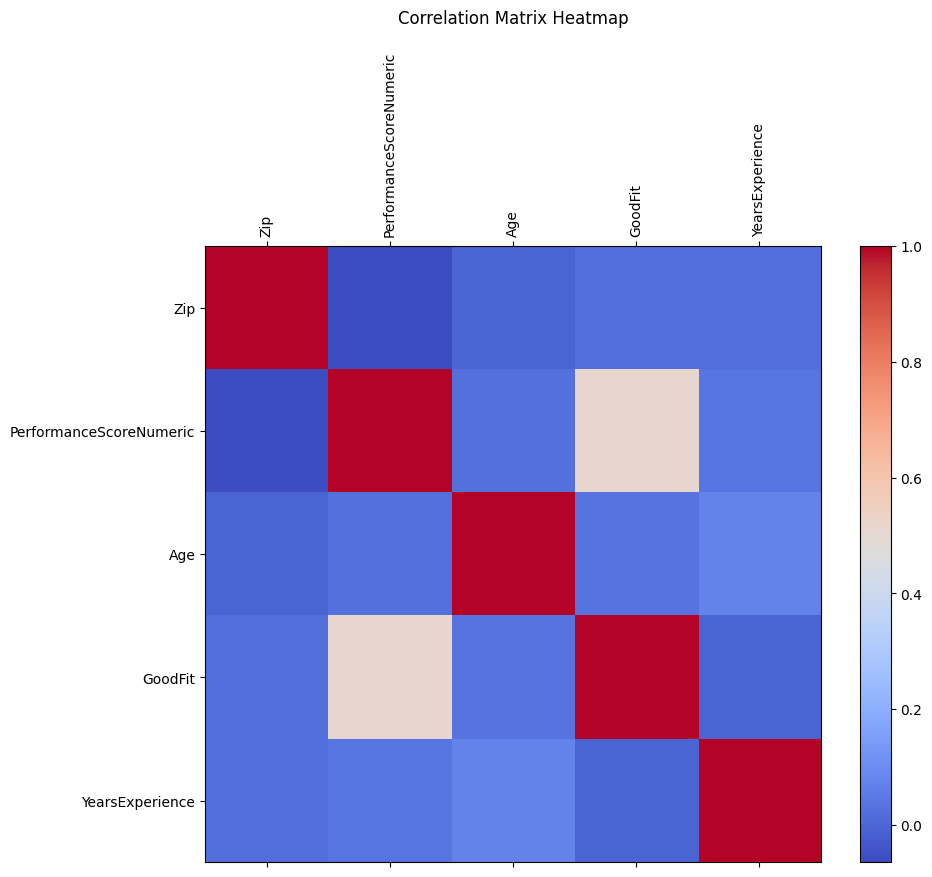

In [20]:
# Ensure the dataframe is ready for correlation analysis by converting necessary columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap for better visualization
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=0)  # Use fignum=0 for a new figure
plt.colorbar()
plt.xticks(range(len(numeric_df.columns)), numeric_df.columns, rotation=90)
plt.yticks(range(len(numeric_df.columns)), numeric_df.columns)
plt.title("Correlation Matrix Heatmap", pad=20)
plt.show()

In [21]:
# Distribution of RaceDesc considering GoodFit
race_goodfit_distribution = df.groupby(['RaceDesc', 'GoodFit']).size().unstack(fill_value=0)
print("Race Distribution by GoodFit:")
print(race_goodfit_distribution)

# Distribution of Sex (Gender) considering GoodFit
gender_goodfit_distribution = df.groupby(['Sex', 'GoodFit']).size().unstack(fill_value=0)
print("\nGender Distribution by GoodFit:")
print(gender_goodfit_distribution)

Race Distribution by GoodFit:
GoodFit                             0     1
RaceDesc                                   
American Indian or Alaska Native    5    39
Asian                              30   242
Black or African American          81   379
Hispanic                            8    55
Two or more races                  28   162
White                             416  1685

Gender Distribution by GoodFit:
GoodFit    0     1
Sex               
F        331  1409
M        237  1153


In [22]:
df.head(2)

,Employee_Name,Position,State,Zip,Sex,CitizenDesc,HispanicLatino,RaceDesc,Department,PerformanceScoreNumeric,Age,GoodFit,YearsExperience,AgeGroup,ExperienceCategory,Skills,Certifications,Education
0,"Gonzalez, Maria",IT Support,MA,2472.0,F,US Citizen,Yes,White,IT/IS,3,43,1,10,30-50,11-20 years,"[Troubleshooting, Hardware Maintenance, Customer Support, Network Configuration]",[Microsoft Certified: Azure Fundamentals],Bachelor’s
1,"Cockel, James",Production Technician I,MA,2452.0,M,US Citizen,No,White,Production,3,47,1,11,30-50,11-20 years,"[Safety Protocols, Problem Identification, Teamwork]",[OSHA Certification],Bachelor’s


In [23]:
def clean_certifications(certifications):
    if isinstance(certifications, list):
        # Process each certification in the list
        clean_list = []
        for cert in certifications:
            if isinstance(cert, str):
                # Add strings directly
                clean_list.append(cert)
            elif isinstance(cert, tuple) and isinstance(cert[0], str):
                # Extract the string part of the tuple
                clean_list.append(cert[0])
        return clean_list
    else:
        # Handle non-list entries
        return []

df['Certifications'] = df['Certifications'].apply(clean_certifications)

# Verify the cleaned column
print(df['Certifications'].head())

0                   [Microsoft Certified: Azure Fundamentals]
1                                        [OSHA Certification]
2                                      [Salesforce Certified]
3                [Salesforce Certified, Salesforce Certified]
4    [Basic Safety Certification, Basic Safety Certification]
Name: Certifications, dtype: object


In [24]:
# Drop columns that are not required: fitpoints
df = df.drop(columns=['FitPoints', 'PerformanceScoreNumeric', 'Zip'], errors='ignore')

In [25]:
df.to_parquet("../data/interim/hr_data_simulated.parquet")

### Final Thoughts: Simulation Enhancements for Real-World Applicability

With the simulated data integration, the dataset now incorporates realistic features such as skills, certifications, education levels, and performance-based adjustments. These additions provide a more nuanced representation of employee qualifications, aligning closer to real-world CV screening scenarios.

The inclusion of tailored role thresholds and the recalibration of the `GoodFit` metric allows us to better evaluate role alignment while highlighting gaps in qualifications. This iterative approach ensures that our bias and fairness analysis can address practical challenges faced by hiring systems.

The next steps will focus on preparing the enhanced dataset for modeling. This includes encoding categorical variables, balancing class distributions, and ensuring the features align with the requirements of machine learning models. By building on this foundation, we aim to refine the fairness demonstrator and draw meaningful insights into the equity and efficacy of automated screening systems.
